Enter number of points: 20


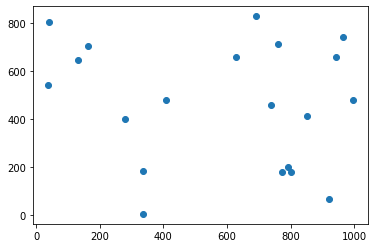

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
point 1: 335, 6
point 2: 920, 66
point 3: 995, 478
point 4: 964, 741
point 5: 691, 828


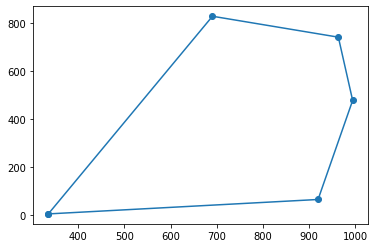

In [12]:
#Zach Macadam
#COSC 40403
#12/15/2019

#Program to implement Graham-Scan for convex hull plotting
#Pseudocode from textbook

import numpy as np
import matplotlib.pyplot as plt
from math import atan2

points = []
xcoords = []
ycoords = []

class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.polar = 0
        self.distance = 0
        self.vec_x = 0
        self.vec_y = 0
    def __sub__(self, other):
        self.vec_x = self.x - other.x
        self.vec_y = self.y - other.y
        
def find_p0(points):
    min_y = float("inf")
    min_index = 0
    for i, point in enumerate(points):
        if point.y < min_y:
            min_y = point.y
            min_index = i
        if point.y == min_y:
            if point.x < points[min_index].x:
                min_index = i
    return points[min_index], min_index

def scatter(n):
    for i in range(0,n):
        point.x = np.random.randint(1000)
        point.y = np.random.randint(1000)
        xcoords.append(point.x)
        ycoords.append(point.y)
        points.append(point(point.x,point.y))
    plt.scatter(xcoords, ycoords)
    plt.show()
    
def polar_angle(p0, p1):
    y_span = p1.y - p0.y
    x_span = p1.x - p0.x
    return atan2(y_span, x_span)

def distance(p0, p1):
    return math.sqrt((p1.x - p0.x)**2 + (p1.y - p0.y)**2)

def calc_angle(p1, p2, p3):
    return((p2.x - p1.x)*(p3.y - p1.y)-(p2.y - p1.y)*(p3.x - p1.x))
    
def graham_scan(points):
    p0, index = find_p0(points)
    points[0], points[index] = points[index], points[0]
    for i in range(1, len(points)):
        pa = polar_angle(p0, points[i])
        d = distance(p0, points[i])
        points[i].polar = pa
        points[i].distance = d
        print(points[i] - p0)
    points.sort(key=lambda p1: (p1.vec_y, p1.vec_x, p1.distance))
    remove = []
    for i in range(1, len(points) - 1):
        if (calc_angle(points[i], points[i+1], p0) == 0):
            remove.append(i)
    points = [i for j, i in enumerate(points) if j not in remove]
    if len(points) < 2:
        print('Convex hull is empty!')
    else: 
        p1 = points[1]
        p2 = points[2]
        stack = []
        stack.append(p0)
        stack.append(p1) #next to top
        stack.append(p2) #top
        for i in range(3, len(points)):
            while(len(stack) > 1 and calc_angle(stack[-2], stack[-1], points[i]) <= 0):
                stack.pop()
            stack.append(points[i])
    return stack

def __main__():
    n = int(input("Enter number of points: "))
    scatter(n)
    ans = graham_scan(points)
    axc = []
    ayc = []
    for i, obj in enumerate(ans):
        print("point %d: %d, %d" % (i+1, obj.x, obj.y))
        axc.append(obj.x)
        ayc.append(obj.y)
    axc.append(axc[0])
    ayc.append(ayc[0])
    plt.scatter(axc, ayc)
    plt.plot(axc, ayc)
    plt.show()
    
__main__()


        
